C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


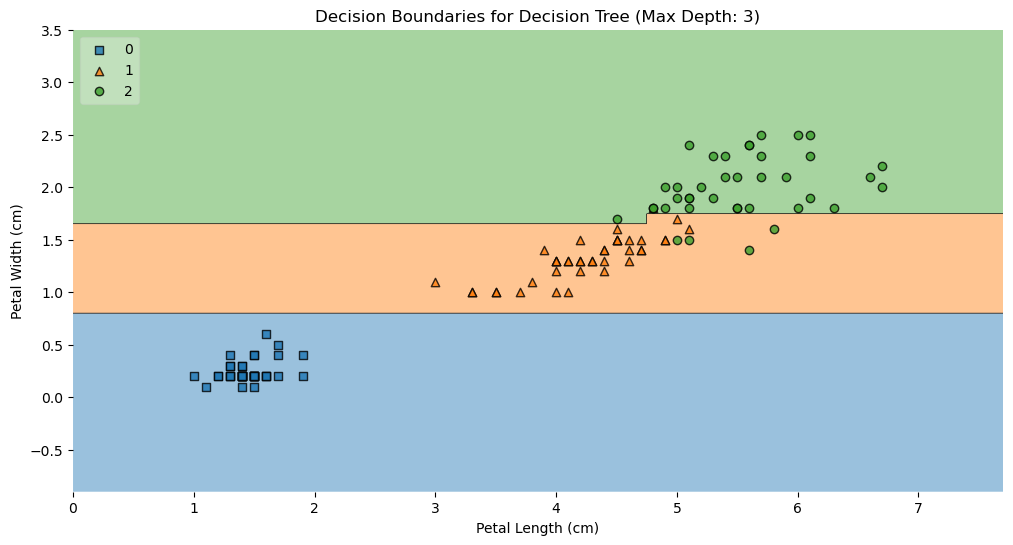

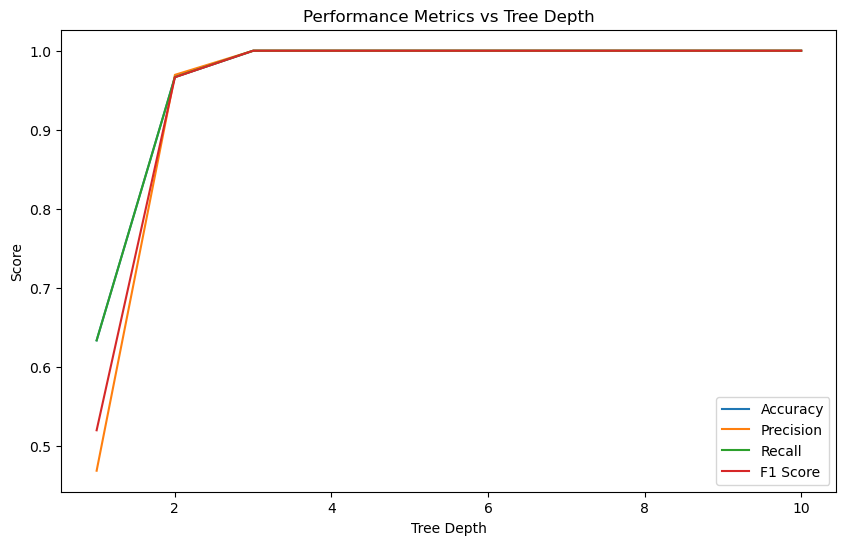

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions  # Updated import

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # Considering only petal length and width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree models with various maximum depths
depths = list(range(1, 11))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Visualize the decision boundaries of the best-performing model
best_depth = depths[np.argmax(accuracy_scores)]
best_model = DecisionTreeClassifier(max_depth=best_depth)
best_model.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_decision_regions(X_train, y_train, clf=best_model, legend=2)  # Updated visualization
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title(f'Decision Boundaries for Decision Tree (Max Depth: {best_depth})')
plt.show()

# Plot the performance metrics against the tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, label='Accuracy')
plt.plot(depths, precision_scores, label='Precision')
plt.plot(depths, recall_scores, label='Recall')
plt.plot(depths, f1_scores, label='F1 Score')
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.title('Performance Metrics vs Tree Depth')
plt.legend()
plt.show()